In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

## read trait information

In [2]:
df_LA = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_la.csv")
df_SLA = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_sla.csv")
df_LDMC = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_ldmc.csv")
df_d15n = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_d15n.csv")
df_d13c = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_d13c.csv")
df_pc = pd.read_csv(r"E:\wenqu\UAS_csv\vresion2\grouped_sla_la_ldmc.csv")
df_pn = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_pn.csv")

In [3]:
df_pn

,site_quadrat,summed_sla_cover,la_cover,LDMC_cover,weighted_pc,weighted_d13c,weighted_pn,log_pn,weighted_d15n,b1_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,S1B_1,142.017256,16.964266,0.399141,43.312469,-28.492351,1.599822,0.469893,-2.674121,0.008066,...,0.043727,0.039954,0.037774,0.036505,0.031699,0.034067,0.029817,0.037205,0.029428,0.042243
1,S1B_10,137.317848,19.273836,0.378223,39.021692,-28.543685,1.793593,0.584221,1.831298,0.009731,...,0.198313,0.074142,0.189852,0.078799,0.192470,0.080803,0.186395,0.084301,0.161744,0.079994
2,S1B_11,106.218469,21.611294,0.394541,28.722149,-26.496804,1.220057,0.198897,2.088882,0.009178,...,0.189777,0.070316,0.183232,0.071065,0.175422,0.073488,0.174616,0.078000,0.156058,0.081847
3,S1B_12,108.293186,12.971441,0.454268,49.725401,-27.295808,1.669954,0.512796,-1.259432,0.015963,...,0.348449,0.138326,0.329519,0.134143,0.340357,0.137214,0.337107,0.149233,0.307343,0.140250
4,S1B_14,128.988016,13.467315,0.428302,46.145474,-27.755471,1.496956,0.403434,-1.321241,0.013563,...,0.252416,0.073635,0.247089,0.073669,0.246966,0.075640,0.244557,0.080912,0.215159,0.088266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,S6A_2,99.966421,6.646571,0.526915,42.729909,-28.139459,1.385140,0.325801,-2.243014,0.001764,...,0.221164,0.041042,0.215201,0.040010,0.211748,0.037922,0.213296,0.039325,0.230566,0.046107
58,S6A_3,90.083637,8.562060,0.451583,43.400001,-27.593925,1.288065,0.253141,-1.346010,0.005791,...,0.219809,0.021686,0.216944,0.021668,0.211431,0.027552,0.213977,0.028577,0.209987,0.033540
59,S6A_4,99.138209,28.986345,0.370038,44.852165,-25.128604,1.873933,0.628039,2.988825,0.003569,...,0.083550,0.037987,0.075903,0.039146,0.075462,0.043852,0.077467,0.044924,0.089143,0.054125
60,S6A_5,109.347690,25.340909,0.381288,44.224496,-25.363508,1.586383,0.461457,4.010341,0.002972,...,0.076370,0.025011,0.075379,0.027088,0.071527,0.024816,0.069751,0.028198,0.087143,0.053418


## get band informationn

In [4]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
#     b_std = 'b' + str(i) + '_std'
#     b_name_std.append(b_std)
band_name = b_name_mean 
band_name = np.array(band_name)
band_name

array(['b1_mean', 'b2_mean', 'b3_mean', 'b4_mean', 'b5_mean', 'b6_mean',
       'b7_mean', 'b8_mean', 'b9_mean', 'b10_mean', 'b11_mean',
       'b12_mean', 'b13_mean', 'b14_mean', 'b15_mean', 'b16_mean',
       'b17_mean', 'b18_mean', 'b19_mean', 'b20_mean', 'b21_mean',
       'b22_mean', 'b23_mean', 'b24_mean', 'b25_mean', 'b26_mean',
       'b27_mean', 'b28_mean', 'b29_mean', 'b30_mean', 'b31_mean',
       'b32_mean', 'b33_mean', 'b34_mean', 'b35_mean', 'b36_mean',
       'b37_mean', 'b38_mean', 'b39_mean', 'b40_mean', 'b41_mean',
       'b42_mean', 'b43_mean', 'b44_mean', 'b45_mean', 'b46_mean',
       'b47_mean', 'b48_mean', 'b49_mean', 'b50_mean', 'b51_mean',
       'b52_mean', 'b53_mean', 'b54_mean', 'b55_mean', 'b56_mean',
       'b57_mean', 'b58_mean', 'b59_mean', 'b60_mean', 'b61_mean',
       'b62_mean', 'b63_mean', 'b64_mean', 'b65_mean', 'b66_mean',
       'b67_mean', 'b68_mean', 'b69_mean', 'b70_mean', 'b71_mean',
       'b72_mean', 'b73_mean', 'b74_mean', 'b75_mean', 'b76

In [5]:
len(band_name)  

122

## prepare y variable for each traits

In [6]:
y_weighted_sla = df_SLA['summed_sla_cover'].to_numpy()
y_weighted_la = df_LA['la_cover'].to_numpy()
y_weighted_LDMC = df_LDMC['LDMC_cover'].to_numpy()


y_weighted_pc = df_pc['weighted_pc'].to_numpy()
y_weighted_d13c = df_d13c['weighted_d13c'].to_numpy()
y_weighted_pn = df_pn['weighted_pn'].to_numpy()
y_weighted_d15n = df_d15n['weighted_d15n'].to_numpy()






In [7]:
# df_LA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_SLA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_LDMC = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_15n = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_13c = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pc = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pn = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")

In [8]:
x_pc = np.array(df_pc[band_name])
x_pn = np.array(df_pn[band_name])
x_ldmc = np.array(df_LDMC[band_name])
x_la = np.array(df_LA[band_name])
x_sla = np.array(df_SLA[band_name])
x_d13c = np.array(df_d13c[band_name])
x_d15n = np.array(df_d15n[band_name])

In [9]:
x_la

array([[0.00806591, 0.02010676, 0.00535555, ..., 0.0159339 , 0.02311397,
        0.0204096 ],
       [0.00973139, 0.02140905, 0.00694379, ..., 0.02165732, 0.08390604,
        0.02915795],
       [0.01596289, 0.0302402 , 0.00918104, ..., 0.0142149 , 0.06870674,
        0.0240318 ],
       ...,
       [0.00356905, 0.00726204, 0.00571381, ..., 0.01333697, 0.0563773 ,
        0.0142331 ],
       [0.00297173, 0.00984673, 0.00391134, ..., 0.00481245, 0.0517692 ,
        0.00517001],
       [0.00331892, 0.00672721, 0.00407369, ..., 0.00590947, 0.06942737,
        0.00557909]])

## prepare site label information for each trait

In [10]:
labels_sla = [] 
for i in range(len(df_SLA['site_quadrat'])):
    
    site_name = df_SLA['site_quadrat'][i].split("_")[0]

    labels_sla.append(site_name)

In [11]:
labels_la = [] 
for i in range(len(df_LA['site_quadrat'])):    
    site_name = df_LA['site_quadrat'][i].split("_")[0]
    labels_la.append(site_name)

In [12]:
labels_ldmc = [] 
for i in range(len(df_LDMC['site_quadrat'])):    
    site_name = df_LDMC['site_quadrat'][i].split("_")[0]
    labels_ldmc.append(site_name)

In [13]:
labels_pc = [] 
for i in range(len(df_pc['site_quadrat'])):
    
    site_name = df_pc['site_quadrat'][i].split("_")[0]

    labels_pc.append(site_name)

In [14]:
labels_d13c = [] 
for i in range(len(df_d13c['site_quadrat'])):
    
    site_name = df_d13c['site_quadrat'][i].split("_")[0]

    labels_d13c.append(site_name)

In [15]:
labels_pn = [] 
for i in range(len(df_pn['site_quadrat'])):
    
    site_name = df_pn['site_quadrat'][i].split("_")[0]

    labels_pn.append(site_name)

In [16]:
labels_d15n = [] 
for i in range(len(df_d15n['site_quadrat'])):
    
    site_name = df_d15n['site_quadrat'][i].split("_")[0]

    labels_d15n.append(site_name)

In [17]:
print(len(labels_sla), len(labels_la), len(labels_ldmc), len(labels_pc), len(labels_d15n), len(labels_d13c), len(labels_pn))

52 54 54 65 51 51 62


In [18]:
print(len(labels_d15n), len(labels_la), len(labels_ldmc))

51 54 54


## leave one out cross validation plsr model

In [19]:
def pls_variable_selection(X, y, max_comp):
    
    # Define an MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))



    # Loop over the number of PLS components
    for i in range(max_comp):
        # print(i)
        
        # Regression with the specified number of components, using the full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
 
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        # Discard one wavelength at a time from the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(max_j): 
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y.astype(np.float64), cv=5)
          

            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))        
            

      

    
    stdout.write("\n")
    
    # Find the indices of the minimum non-NaN MSE values
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    
    print("Optimised number of PLS components: ", mseminx[0] + 1)
    print("Wavelengths to be kept ", (X.shape[1] - mseminy[0]))
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")
 
    # Calculate PLS with optimal components and export values
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:, sorted_ind]
 
    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind

## train the model - plot the result based on different site label

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import csv

def simple_pls_cv(X, y, n_comp, labels, filename):
    


    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)


    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    # rmse_c = mean_squared_error(y, y_c, squared=False)
    # rmse_cv = mean_squared_error(y, y_cv, squared=False)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    # print('RMSE calib: %5.3f' % rmse_c)
    # print('RMSE CV: %5.3f' % rmse_cv)

    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    print(z[1],z[0])
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'S1B': {'marker': 'o', 'color': 'red'},
            'S2A': {'marker': 's', 'color': 'blue'},
            'S2C': {'marker': 'P', 'color': 'yellow'},
            'S6A': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
            
            
        for i, label in enumerate(labels):
            
            
            scatter_obj = ax.scatter(y_cv[i], y[i], marker=label_dict.get(label, label_dict['S6A'])['marker'],
                                     c=label_dict.get(label, label_dict['S6A'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
        return pls 


## log transform y variable

In [21]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)
log_y_weighted_pc = np.log(y_weighted_pc)
# log_y_weighted_d13c = np.log(y_weighted_d13c)
log_y_weighted_pn = np.log(y_weighted_pn)
# log_y_weighted_d15n = np.log(y_weighted_d15n)

# PC model 

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pc, y_weighted_pc, 30)


Optimised number of PLS components:  1
Wavelengths to be kept  31
Optimised MSEP  3.2832639593660935



R2 calib: 0.109
R2 CV: 0.073
40.37459304656261 0.10575601463528463
0 S1B 43.33746431678936 43.31246864
1 S1B 44.30610748168721 39.0216923
2 S1B 43.92825307338433 28.722149
3 S1B 44.612528371796955 49.7254015
4 S1B 44.443687357280616 46.14547363
5 S1B 46.04531781820749 44.42864699
6 S1B 43.590684076287836 44.92653785
7 S1B 44.86017614233461 48.51669384
8 S1B 44.620402487465746 47.67653853
9 S1B 44.49969324715531 47.42492852
10 S1B 45.43846909559963 46.92552143
11 S1B 44.33532920534241 47.85193438
12 S1B 44.83683954947815 46.11798156
13 S1B 46.22143025673742 46.77254171
14 S1B 45.77778162445568 46.42601833
15 S1B 47.10110427875437 46.19676128
16 S1B 44.868685896654746 44.43411362
17 S1B 46.712160578200084 45.64992568
18 S1B 44.954105642988175 48.58916759
19 S1B 44.46493757207304 40.45349224
20 S1B 43.35056817500951 44.63180763
21 S1B 44.627106950067954 45.49917166
22 S1B 43.44001210239588 45.58493973
23 S1B 43.921532061920566 48.00132616
24 S2A 44.19087950565766 46.08297701
25 S2A 45.534

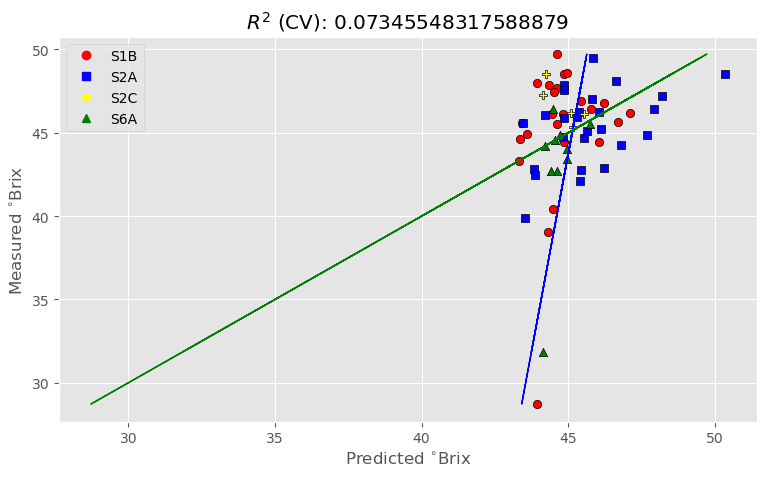

PLSRegression(n_components=1)

In [24]:
file_name_sla = r'D:\wenqu\chapter1_2\plot_level_model\122\pc.csv'
simple_pls_cv(opt_Xc, y_weighted_pc, ncomp, labels_pc,file_name_sla)

In [24]:
band_name[sorted_ind][wav:]

array(['b89_std', 'b32_mean', 'b25_mean', 'b104_mean', 'b8_std',
       'b89_mean', 'b46_std', 'b61_mean', 'b54_mean', 'b20_mean',
       'b94_mean', 'b44_std', 'b117_mean', 'b121_std', 'b95_mean',
       'b95_std', 'b35_mean', 'b48_mean', 'b87_std', 'b78_mean',
       'b106_mean', 'b84_std', 'b98_mean', 'b42_std', 'b42_mean',
       'b118_mean', 'b59_mean', 'b79_std', 'b103_std', 'b34_mean',
       'b14_std', 'b81_std', 'b96_mean', 'b83_std', 'b113_mean',
       'b26_std', 'b13_mean', 'b110_mean', 'b58_std', 'b12_mean',
       'b58_mean', 'b22_std', 'b29_mean', 'b62_std', 'b99_std', 'b88_std',
       'b46_mean', 'b82_mean', 'b4_mean', 'b116_std', 'b91_mean',
       'b104_std', 'b122_mean', 'b100_std', 'b70_mean', 'b25_std',
       'b48_std', 'b72_std', 'b115_std', 'b86_std', 'b56_std', 'b92_std',
       'b4_std', 'b110_std', 'b102_std', 'b113_std', 'b84_mean',
       'b9_mean', 'b93_std', 'b80_std', 'b62_mean', 'b120_mean',
       'b109_std', 'b22_mean', 'b66_std', 'b112_std'], dtype=

In [25]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=27, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_pc)



PLSRegression(n_components=27)

In [26]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [3.77462549 3.66340001 3.36786221 3.89954388 3.83315991]
Sklearn predictions: [3.77462549 3.66340001 3.36786221 3.89954388 3.83315991]
Max difference: 4.440892098500626e-16


In [27]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-1.7658325838765145,
 29.120811999628724,
 -6.332967910522302,
 7.9789533577284155,
 9.160707394587837,
 1.87744672276878,
 -4.776092177931818,
 1.814388330156094,
 -8.968476202161915,
 14.332321043037913,
 -13.156592262304184,
 4.569868426984881,
 6.217463721552949,
 0.17310917088390068,
 -2.507652027607728,
 1.2651316177274272,
 10.179553591051176,
 32.57526654950375,
 -0.05819147914903842,
 23.527022347454103,
 18.27198624923695,
 -3.767855759036007,
 2.8565104422685548,
 -3.588433447618994,
 -13.969871843957419,
 -10.709311449842435,
 6.89246511739961,
 1.6134070076415346,
 -0.5899755398665395,
 17.551110662707195,
 -0.8309844514514438,
 -2.0750884373172367,
 20.14261217829866,
 -0.8041572677211729,
 -0.9156586148718759,
 3.0266027157826927,
 -13.41104500706184,
 8.918295845632207,
 10.038773663088408,
 17.639792908716863,
 21.238281292091855,
 -10.583871468777636,
 -11.45224561954544,
 5.167447059908274,
 1.3436244822337446,
 -5.064883675922512,
 13.907328371361015,
 -7.031489879

In [28]:
transformed_intercept

array([3.71550615])

# PN


Optimised number of PLS components:  15
Wavelengths to be kept  31
Optimised MSEP  0.22933739765743005

R2 calib: 0.777
R2 CV: 0.301
0.1687181749442381 0.5608798877013533
0 S1B 0.42851964273115717 0.4698925987070734
1 S1B 0.524568739658382 0.5842210573386667
2 S1B 0.2978329973933639 0.19889733307505286
3 S1B 0.23021049242490743 0.5127960697615571
4 S1B 0.5011315426666735 0.4034339186388153
5 S1B 0.08885322979753185 0.026225597943274455
6 S1B 0.5063015115478623 0.6586663699392942
7 S1B 0.6138856938107257 0.39272768918414447
8 S1B 0.17828614086489047 0.2223562806980066
9 S1B 0.44468320366689423 0.4545871384737593
10 S1B 0.606108988513325 0.3576893637409396
11 S1B 0.5159506292503833 0.7422890833382898
12 S1B 0.1846046106651319 0.38851749721129836
13 S1B 0.38642016355141334 0.25715636301359845
14 S1B 0.6455799947266672 0.30882683544547823
15 S1B 0.3662853475770989 0.2577943189241944
16 S1B 0.43322028631420745 0.6128983235557623
17 S1B 0.6603396924189868 0.5715587228985487
18 S1B 0.4906327

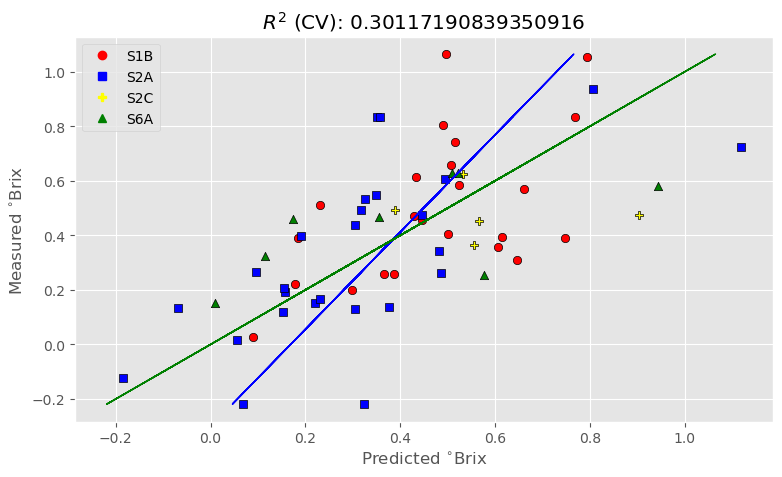

PLSRegression(n_components=15)

In [25]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pn, log_y_weighted_pn, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\pn.csv'
simple_pls_cv(opt_Xc, log_y_weighted_pn, ncomp, labels_pn, file_name)

In [24]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=29, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_pn)


PLSRegression(n_components=29)

In [25]:
band_name[sorted_ind][wav:]

array(['b26_std', 'b53_mean', 'b78_std', 'b79_std', 'b46_mean',
       'b36_mean', 'b95_std', 'b48_std', 'b80_std', 'b103_std',
       'b102_std', 'b27_mean', 'b56_std', 'b10_std', 'b116_mean',
       'b111_mean', 'b8_std', 'b92_mean', 'b117_std', 'b74_std',
       'b81_std', 'b100_std', 'b25_std', 'b99_std', 'b112_mean',
       'b101_std', 'b6_std', 'b14_mean', 'b44_std', 'b119_mean',
       'b106_std', 'b28_mean', 'b48_mean', 'b121_mean', 'b9_mean',
       'b64_mean', 'b21_mean', 'b54_mean', 'b34_mean', 'b72_mean',
       'b88_std', 'b113_mean', 'b26_mean', 'b64_std', 'b16_mean',
       'b119_std', 'b74_mean', 'b96_std', 'b98_std', 'b13_mean',
       'b111_std', 'b100_mean', 'b4_mean', 'b29_mean', 'b1_mean',
       'b121_std', 'b68_mean', 'b118_std', 'b104_mean', 'b84_std',
       'b25_mean', 'b93_std', 'b60_mean', 'b122_mean', 'b18_mean',
       'b58_mean', 'b104_std', 'b113_std', 'b118_mean'], dtype='<U9')

In [26]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [0.46136476 0.55506105 0.21825927 0.53904916 0.43718157]
Sklearn predictions: [0.46136476 0.55506105 0.21825927 0.53904916 0.43718157]
Max difference: 3.9968028886505635e-15


In [27]:
transformed_intercept

array([0.5205581])

In [28]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-6.251628768478961,
 32.16297703050638,
 -15.068628308076393,
 5.428252214364907,
 69.84643119591176,
 -27.685949618955107,
 4.40287919999009,
 5.735672607996701,
 34.02960449465758,
 -0.6118783449168849,
 16.023021175982127,
 -1.571890294710857,
 5.267401538413659,
 -4.667570565393137,
 47.49298377747452,
 40.13808656632717,
 14.338359073283067,
 -112.51008777647093,
 -1.8522656999577334,
 -14.03968939176024,
 -4.501391016442681,
 5.772067445321137,
 3.663699989711924,
 -3.6502597458464097,
 -12.996227746640129,
 3.4235185386475186,
 49.97093653774433,
 12.152042115741725,
 7.282388953435546,
 -7.946552505788617,
 -7.17802053622849,
 -15.041178522050824,
 116.62806221639276,
 -22.571467877855625,
 83.11794281129177,
 44.0430480907075,
 6.42955385330087,
 23.08306612593665,
 -75.66751432804995,
 47.65465880879377,
 -6.322995188871767,
 29.805238789786884,
 6.762371277451969,
 -6.2953441369896685,
 -126.35524998261204,
 -6.979214088893311,
 15.539067359637967,
 2.161169527958224,
 19.9

# d13c

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, y_weighted_d13c, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\d13c.csv'


Optimised number of PLS components:  15
Wavelengths to be kept  32
Optimised MSEP  0.5038205890429519



R2 calib: 0.952
R2 CV: 0.805
-4.131175860825754 0.854277212912215
0 S1B -28.669327790397084 -28.49235106
1 S1B -28.46813767274734 -28.54368527
2 S1B -27.073492317179422 -27.29580842
3 S1B -28.313134011555107 -28.97319202
4 S1B -27.920913179555214 -28.6815368
5 S1B -26.973120854760108 -27.20402389
6 S1B -28.808705758344022 -28.96674046
7 S1B -27.82970484999452 -27.38240162
8 S1B -27.369904788655024 -27.15925765
9 S1B -27.35776480248082 -27.27176191
10 S1B -28.61446969452024 -28.729117
11 S1B -28.403077956022926 -28.43561468
12 S1B -27.973662842861227 -26.69813342
13 S1B -27.174493894735722 -27.25219021
14 S1B -29.619732436365634 -28.65229353
15 S1B -27.95793185606917 -27.46525833
16 S1B -27.63413879037955 -27.741047
17 S1B -28.65363361528383 -28.88539209
18 S1B -27.618112846944715 -28.20457812
19 S1B -27.675081894078254 -27.71653005
20 S1B -27.96066148324592 -27.35140639
21 S2A -29.593884079295385 -29.41902791
22 S2A -29.158767726822127 -29.4062208
23 S2A -29.23785244981164 -29.02625371

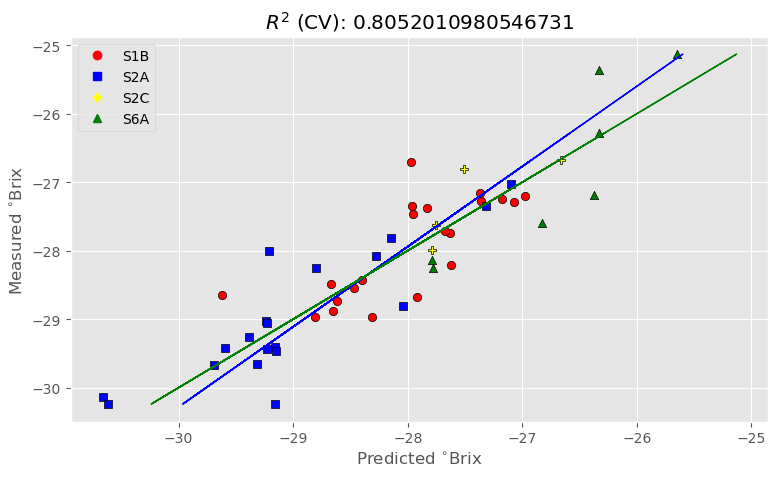

PLSRegression(n_components=15)

In [23]:

simple_pls_cv(opt_Xc, y_weighted_d13c, ncomp, labels_d13c, file_name)

In [24]:
band_name[sorted_ind][wav:]

array(['b82_mean', 'b56_mean', 'b75_mean', 'b67_mean', 'b99_mean',
       'b97_mean', 'b57_mean', 'b35_mean', 'b26_mean', 'b5_mean',
       'b116_mean', 'b17_mean', 'b1_mean', 'b14_mean', 'b73_mean',
       'b28_mean', 'b3_mean', 'b39_mean', 'b51_mean', 'b122_mean',
       'b40_mean', 'b30_mean', 'b49_mean', 'b42_mean', 'b76_mean',
       'b48_mean', 'b8_mean', 'b34_mean', 'b121_mean', 'b52_mean',
       'b15_mean', 'b7_mean'], dtype='<U9')

In [25]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=15, scale=True)
pls_final.fit(opt_Xc,y_weighted_d13c)



PLSRegression(n_components=15)

In [1]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

NameError: name 'pls_final' is not defined

In [27]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[236.61852623486863,
 -482.88222925347776,
 138.77216745347565,
 -44.673199569661506,
 -130.83854381839146,
 -69.32322347897814,
 -130.99011762271542,
 174.92483319157319,
 86.31135633974849,
 103.09103836913387,
 44.41173006786578,
 -0.13247107610119974,
 83.19520249834109,
 525.2716626984129,
 78.22438490255212,
 290.4246751239607,
 -97.49652904815359,
 -232.4310991099464,
 161.20342046086108,
 104.632806150325,
 -387.46969869396503,
 116.29419474030463,
 138.606982935393,
 -116.52149104887903,
 -357.40088662930526,
 -128.67990761302707,
 -366.92702046262247,
 -364.4010164924634,
 -70.19222226778966,
 765.1253660579733,
 458.31738032251434,
 -476.77803435807124]

In [28]:
transformed_intercept

array([-27.40784303])

# d15n

In [29]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d15n, y_weighted_d15n, 30)


Optimised number of PLS components:  1
Wavelengths to be kept  37
Optimised MSEP  2.686879647912242



R2 calib: 0.076
R2 CV: -0.082
-0.5550815454295758 -0.0012529483781650492
0 S1B 0.06470290640498821 -2.674120998
1 S1B -0.2942457156739757 1.831297519
2 S1B 0.0974291940579125 -1.259432228
3 S1B 0.036348090316533466 -4.042904221
4 S1B -0.6939621359384873 -1.73009192
5 S1B -1.6146210355039745 -2.647368389
6 S1B -0.3698918407315029 1.36352194
7 S1B -1.1430424476007752 -1.414529963
8 S1B -0.7155625059465459 -0.782025641
9 S1B -0.9214223062038362 -0.002255068
10 S1B -2.2805024194831613 -0.722110205
11 S1B -1.1941750039359675 0.847306639
12 S1B -2.41847697381081 -2.601431106
13 S1B -1.4025101104529234 -3.065337528
14 S1B -1.7628958151443912 0.007594137
15 S1B -0.5908330005917745 -0.975922671
16 S1B -1.3930806945891154 -0.647548399
17 S1B -0.023578911115883394 -1.924507133
18 S1B 0.2608475933994405 4.177666307
19 S1B 0.15324448765370902 -3.236060485
20 S2A 0.006641557285498201 -0.851441381
21 S2A -0.4338045854891598 -0.632417485
22 S2A 0.18663243485067307 1.664091002
23 S2A 0.1875775990874251

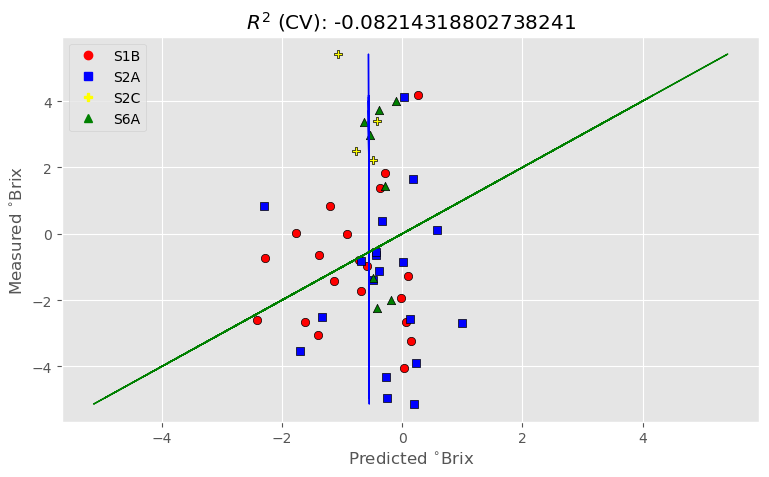

PLSRegression(n_components=1)

In [30]:

file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\d15n.csv'
simple_pls_cv(opt_Xc, y_weighted_d15n, ncomp, labels_d15n, file_name)

In [29]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=19, scale=True)
pls_final.fit(opt_Xc,y_weighted_d15n)


PLSRegression(n_components=19)

In [30]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [-2.46169497  1.62557201 -1.12481565 -4.11244372 -1.48969753]
Sklearn predictions: [-2.46169497  1.62557201 -1.12481565 -4.11244372 -1.48969753]
Max difference: 1.021405182655144e-14


In [31]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-576.12235394461,
 9.312952533125642,
 -14.078178318107819,
 -10.95298643870669,
 -171.4067669255657,
 -53.290014707374375,
 340.3635581526955,
 38.66177021193481,
 -249.47227760841815,
 45.250701604441446,
 42.42255924892193,
 -78.68144375882595,
 -12.659934661679397,
 -11.157060519763505,
 -188.45498619336038,
 -2.203045959129758,
 207.8547604219892,
 305.56921685873175,
 220.47552145697415,
 -86.6160217394219,
 -37.769730995668326,
 78.70709831193402,
 -38.63063530227576,
 268.6137931556368,
 -72.32516477961666,
 85.64669251726099,
 15.914101915449452,
 -35.7897830744088,
 -64.37898322804465,
 -757.1169210324841,
 -153.03999963041116,
 -182.48688000935374,
 153.4965371904876,
 311.3909143648506,
 104.28417853770735,
 133.03734731403748,
 -211.68739335570646,
 428.4872671679126,
 181.69428978162378,
 -196.67279125725358,
 19.52502136135602,
 20.42061366714358,
 -170.2956987623206,
 -77.88425773129373,
 -331.3005428072536,
 -422.1965202706991,
 54.45955329188407,
 357.77412061056197,

In [32]:
transformed_intercept

array([-1.33739063])

# la


Optimised number of PLS components:  19
Wavelengths to be kept  58
Optimised MSEP  0.8364803613039308

R2 calib: 0.978
R2 CV: 0.423
0.5282041850909339 0.7213102794858332
0 S1B 2.6773716540454546 2.831109109942947
1 S1B 2.707794007042037 2.958748531923056
2 S1B 1.654399476612443 2.562750069874877
3 S1B 2.1011346177280297 3.0495296608515043
4 S1B 2.252930534476122 3.209371340556637
5 S1B 3.7104693226105385 2.43062644287493
6 S1B 2.069812890833969 2.082911321477156
7 S1B 3.4546340237639748 2.566051314186708
8 S1B 2.830119108389347 1.4157694638426583
9 S1B 3.1005422785850643 4.02907310785448
10 S1B 1.6538439357895736 2.3894518649342746
11 S1B 2.6443350701954715 2.9339468821512855
12 S1B 1.871302681557772 2.3578955317225954
13 S1B 2.2629519217854854 1.9087718376263287
14 S1B 2.9826632396621333 2.651669193981665
15 S1B 2.596074190701508 2.3363014541896954
16 S1B 2.123589056428165 4.130112305506272
17 S1B 3.0862725482940405 2.497967968911676
18 S1B 4.188241807996444 3.8770588203920506
19 S1B

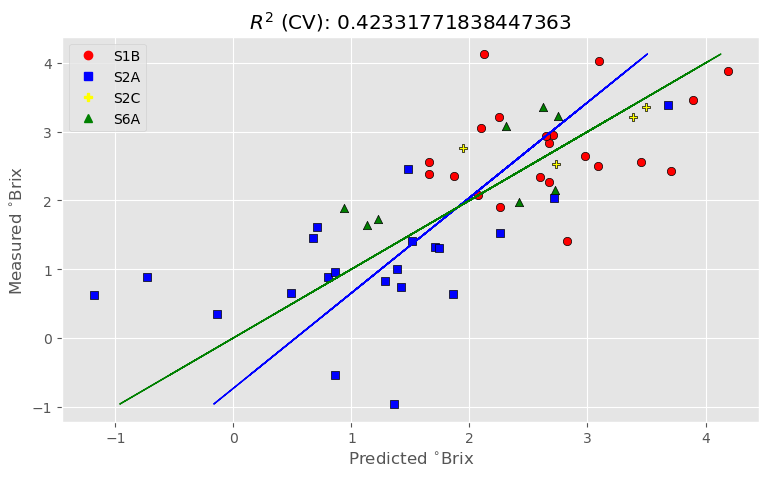

PLSRegression(n_components=19)

In [31]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_la, log_y_weighted_la, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\la.csv'
simple_pls_cv(opt_Xc, log_y_weighted_la, ncomp, labels_la, file_name)

In [23]:
band_name[sorted_ind][wav:]

array(['b19_mean', 'b94_std', 'b27_std', 'b8_mean', 'b50_std', 'b29_mean',
       'b78_std', 'b30_std', 'b44_std', 'b14_mean', 'b68_mean',
       'b39_mean', 'b86_mean', 'b113_mean', 'b62_mean', 'b119_std',
       'b45_std', 'b79_std', 'b36_mean', 'b52_mean', 'b7_mean',
       'b53_mean', 'b94_mean', 'b72_mean', 'b92_mean', 'b44_mean',
       'b84_mean', 'b112_mean', 'b64_std', 'b91_std', 'b46_mean',
       'b107_std', 'b74_std', 'b10_std', 'b89_std', 'b5_std', 'b8_std',
       'b88_std', 'b122_mean', 'b34_mean', 'b55_mean', 'b50_mean',
       'b2_mean', 'b78_mean', 'b5_mean', 'b113_std', 'b121_std',
       'b1_mean', 'b106_std', 'b104_mean', 'b23_mean', 'b6_std',
       'b30_mean', 'b105_std', 'b114_mean', 'b74_mean', 'b103_std',
       'b32_mean', 'b16_mean', 'b100_std', 'b9_mean', 'b84_std',
       'b3_mean', 'b64_mean', 'b93_std', 'b118_std', 'b20_mean',
       'b92_std', 'b24_mean', 'b17_mean', 'b22_mean'], dtype='<U9')

In [24]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=28)
pls_final.fit(opt_Xc,log_y_weighted_la)



PLSRegression(n_components=28)

In [25]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [2.80686618 2.94980843 2.5513144  3.03401766 3.18391962]
Sklearn predictions: [2.80686618 2.94980843 2.5513144  3.03401766 3.18391962]
Max difference: 4.884981308350689e-15


In [26]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[73.43332945115424,
 1.8997071890983306,
 -4.491064038156993,
 -94.3073208396375,
 11.370152240599866,
 6.684057739210883,
 -17.37233750941516,
 -36.55411910672085,
 25.83174613599107,
 -157.33146854618656,
 -135.19597313847248,
 77.12165081708605,
 59.99373576156026,
 -40.443119156803256,
 -168.66580745203618,
 -7.901684152532362,
 7.503367813090542,
 5.578642587316881,
 240.0377767255638,
 211.68909284247232,
 51.08812869986964,
 -84.0047454176666,
 -185.52209469637157,
 109.44052379855532,
 -246.58350519974852,
 -95.6942755183521,
 -48.89093692706882,
 -113.82539343467575,
 39.92044951290615,
 7.558960927578383,
 -44.444525648127474,
 1.1626740772228747,
 -20.94643182989812,
 35.29212008688127,
 -1.3465506803452922,
 26.63026088080052,
 36.231940090125875,
 -43.81384109253915,
 -200.98510258832567,
 -278.4289688211392,
 -15.190023760466007,
 259.4251606170992,
 25.222293740004723,
 162.7808405426492,
 -108.19812140906629,
 -6.482932290214733,
 -5.081460661941372,
 -41.09827756378587

In [27]:
transformed_intercept

array([3.10610339])

# SLA


Optimised number of PLS components:  19
Wavelengths to be kept  51
Optimised MSEP  0.23059058436607022

R2 calib: 0.983
R2 CV: 0.492
1.1543703300646002 0.7380793583703936
0 S1B 4.825233271815703 4.955948567824229
1 S1B 4.928248049172688 4.922298299358316
2 S1B 4.423008430160615 4.6848422323707855
3 S1B 4.686590402870111 4.815337757279735
4 S1B 4.691333916727041 4.773997165237631
5 S1B 4.630222372971774 4.544735888891621
6 S1B 4.9222903586526945 4.692155257922741
7 S1B 4.569466516940581 4.549450435602308
8 S1B 4.4784574070560055 4.489234027672727
9 S1B 4.6626498141409165 4.641577194934574
10 S1B 4.533584696686397 4.733111538329998
11 S1B 4.626883875661494 4.661362096296028
12 S1B 4.728029307162376 4.683412078540948
13 S1B 4.696968362300931 4.946873945464339
14 S1B 4.602251899096015 4.521344729650312
15 S1B 4.480352983668949 4.656390420260098
16 S1B 4.807429560553937 4.850850899830345
17 S1B 4.871784868669304 4.84553197668687
18 S1B 4.904879386233173 4.739598766319705
19 S2A 4.670111817

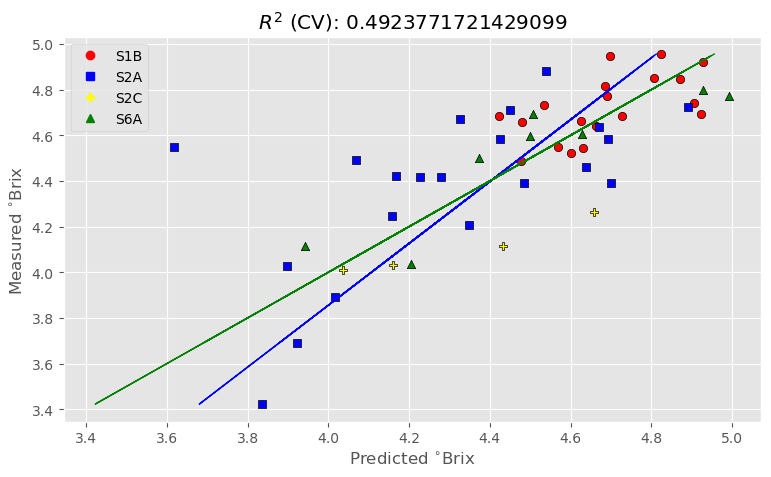

PLSRegression(n_components=19)

In [32]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_sla, log_y_weighted_sla, 20)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\sla.csv'
simple_pls_cv(opt_Xc, log_y_weighted_sla, ncomp, labels_sla, file_name)

In [ ]:
band_name[sorted_ind][wav:]

In [63]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_sla)

intercept = pls_final.intercept_[0]  
print(intercept)

4.600539810210465


# LDMC


Optimised number of PLS components:  28
Wavelengths to be kept  58
Optimised MSEP  0.3352720358004482

R2 calib: 0.998
R2 CV: 0.678
-0.08284103055288587 0.8031267206006829
0 S1B -0.8832607001473384 -0.9184397819289111
1 S1B -1.017914233287759 -0.97227151645054
2 S1B -0.655988635864115 -0.7890678740898547
3 S1B -1.1995213613471067 -0.9314015168963943
4 S1B -1.2508813674472838 -1.0373097291739493
5 S1B -0.6806835875738796 -0.8080338619527949
6 S1B -0.8016453396704107 -0.778369253854089
7 S1B -0.9374058702953928 -0.9022429481473144
8 S1B -0.8304706958570899 -0.808654416065107
9 S1B -0.9293026019623479 -0.9135200487640038
10 S1B -0.8379159196773084 -0.8999872980521808
11 S1B -0.7174131124472618 -0.9198350831728483
12 S1B -0.5979118311357734 -0.7051586523254038
13 S1B -1.0907624797561537 -0.853767692017632
14 S1B -1.2623680663983463 -0.9315144366550555
15 S1B -0.8047024587681653 -0.8536054840183717
16 S1B -1.1208862383652858 -0.9285608731079459
17 S1B -0.5132225339606937 -0.917487873161925

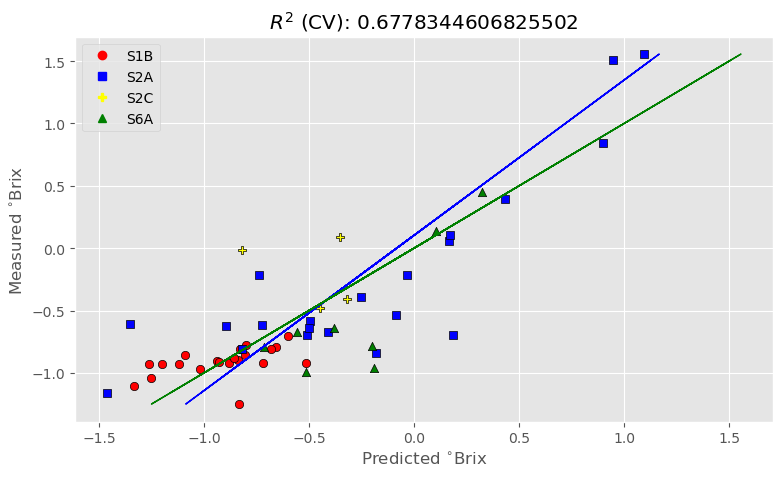

PLSRegression(n_components=28)

In [33]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\122\ldmc.csv'
simple_pls_cv(opt_Xc, log_y_weighted_LDMC, ncomp, labels_ldmc, file_name)

In [29]:
band_name[sorted_ind][wav:]

array(['b66_mean', 'b108_mean', 'b107_std', 'b94_mean', 'b42_mean',
       'b106_std', 'b114_std', 'b108_std', 'b91_std', 'b1_std', 'b44_std',
       'b57_mean', 'b117_mean', 'b12_mean', 'b86_std', 'b72_std',
       'b48_mean', 'b25_std', 'b49_mean', 'b43_mean', 'b74_mean',
       'b11_mean', 'b105_mean', 'b70_mean', 'b121_std', 'b110_std',
       'b119_mean', 'b88_std', 'b84_mean', 'b45_mean', 'b113_std',
       'b121_mean', 'b21_mean', 'b2_mean', 'b32_mean', 'b28_mean',
       'b111_std', 'b7_mean', 'b66_std', 'b24_mean', 'b16_mean',
       'b84_std', 'b58_mean', 'b37_mean', 'b92_std', 'b20_mean',
       'b5_mean', 'b101_std', 'b1_mean', 'b8_mean', 'b10_mean',
       'b102_std'], dtype='<U9')

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=28, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_LDMC)


PLSRegression(n_components=28)

In [24]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [-0.97568537 -0.95194    -0.7938137  -0.97664442 -1.04182814]
Sklearn predictions: [-0.97568537 -0.95194    -0.7938137  -0.97664442 -1.04182814]
Max difference: 5.440092820663267e-15


In [25]:
transformed_intercept

array([-0.63745392])

In [26]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[155.85947095614563,
 -19.295655467861216,
 -13.288417190009008,
 281.13836305344444,
 413.9045066510239,
 -15.744581484856262,
 7.3607782115283555,
 -44.92360620742513,
 -14.745478972515269,
 21.154589415389317,
 15.24786631048062,
 70.58070243510097,
 -9.887005755701429,
 125.32712925971929,
 38.77429621799765,
 -21.95071462168769,
 -144.37511656441998,
 -10.494586315518633,
 -28.970141721320783,
 89.71945820799857,
 -233.82076671408558,
 -64.7606429837618,
 44.81159605686545,
 -12.85790252465078,
 5.79567487970964,
 -21.90337929616464,
 -46.39386184998719,
 -41.581069334533574,
 -167.86607341929522,
 -107.77426870702352,
 9.229822548006904,
 -9.265254285519836,
 -62.566475346085085,
 -21.521976164842847,
 -566.1340776343646,
 -124.46875457877653,
 6.070320250312625,
 -2.115522024251851,
 -49.740950987015175,
 322.61630971182586,
 410.9138338564743,
 56.979917926117004,
 67.99368714891327,
 64.42762844493538,
 37.360247092877906,
 -340.23554110409754,
 24.89496544916215,
 11.24131000


Optimised number of PLS components:  28
Wavelengths to be kept  74
Optimised MSEP  0.7260774692121913

R2 calib: 0.994
R2 CV: 0.628
RMSE calib: 0.090
RMSE CV: 0.723
-0.11861895922876478 0.9945488393612735
0 site1b -28.826165065531036 -28.49235106
1 site1b -27.39932002834734 -28.54368527
2 site1b -26.29638332477497 -26.49680372
3 site1b -27.73067794797311 -27.29580842
4 site1b -26.786869649965258 -27.75547098
5 site1b -29.738771969053484 -28.97319202
6 site1b -26.152448402935466 -25.73567494
7 site1b -28.462922298288117 -28.6815368
8 site1b -26.97924315682576 -27.20402389
9 site1b -28.67533164134222 -28.96674046
10 site1b -28.295776226615637 -27.38240162
11 site1b -27.483718020585677 -27.15925765
12 site1b -28.400031234637886 -27.27176191
13 site1b -28.619182941737193 -28.729117
14 site1b -27.725851406707108 -28.43561468
15 site1b -26.06308743494362 -26.69813342
16 site1b -26.17505094893366 -27.25219021
17 site1b -29.373811732004903 -28.65229353
18 site1b -27.72405646855144 -27.4652583

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


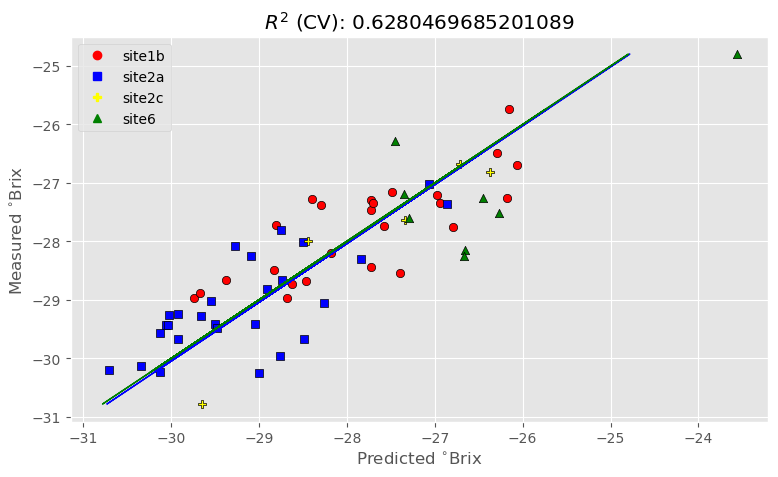

In [28]:
# opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_new_traits, y_weighted_d13c, 50)
# file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\d13c.csv'
# simple_pls_cv(opt_Xc, y_weighted_d13c, ncomp, labels_d13c, file_name)

In [28]:

pls_pc = PLSRegression(n_components=27)
pls_pc.fit(x_new_traits, y_weighted_d13c)

target_pc = pls_pc.coef_[:,0]
sorted_ind_pc = np.argsort(np.abs(target_pc))[::-1]
sorted_value_pc = target_pc[sorted_ind_pc]

print(x_new_traits.shape, sorted_ind_pc.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_pc = band_name[sorted_ind_pc][:66]
print(band_name_pc.shape, band_name_pc)

(65, 244) (244,)
(66,) ['b111_std' 'b17_std' 'b108_mean' 'b10_mean' 'b26_mean' 'b26_std'
 'b122_mean' 'b121_std' 'b109_std' 'b118_std' 'b1_mean' 'b9_mean'
 'b6_mean' 'b45_std' 'b37_std' 'b54_mean' 'b3_mean' 'b29_std' 'b32_std'
 'b107_std' 'b89_std' 'b14_std' 'b50_mean' 'b119_std' 'b93_std' 'b55_mean'
 'b33_std' 'b47_mean' 'b115_std' 'b99_std' 'b117_mean' 'b61_std'
 'b19_mean' 'b59_std' 'b4_mean' 'b8_mean' 'b79_std' 'b68_mean' 'b33_mean'
 'b105_std' 'b53_std' 'b99_mean' 'b108_std' 'b41_mean' 'b56_mean'
 'b112_std' 'b42_std' 'b67_mean' 'b34_std' 'b69_mean' 'b122_std' 'b9_std'
 'b16_mean' 'b7_std' 'b4_std' 'b85_std' 'b69_std' 'b5_std' 'b13_std'
 'b30_mean' 'b40_std' 'b31_mean' 'b5_mean' 'b13_mean' 'b47_std'
 'b120_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# PN

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  37
Wavelengths to be discarded  160
Optimised MSEP  0.033253030129035535

R2 calib: 1.000
R2 CV: 0.664
RMSE calib: 0.004
RMSE CV: 0.161
[0.13190193] [0.73016377]
0 site1b [0.48576221] 0.4698925987070734
1 site1b [0.69908898] 0.5842210573386667
2 site1b [0.42448831] 0.19889733307505286
3 site1b [0.83649179] 0.5127960697615571
4 site1b [0.5307248] 0.4034339186388153
5 site1b [0.39227071] 0.026225597943274455
6 site1b [0.34488962] 0.43226677637704264
7 site1b [0.63084191] 0.6586663699392942
8 site1b [0.62500271] 0.39272768918414447
9 site1b [0.39536417] 0.2223562806980066
10 site1b [0.54980247] 0.4545871384737593
11 site1b [0.40054587] 0.3576893637409396
12 site1b [0.97368987] 0.7422890833382898
13 site1b [0.46338671] 0.38851749721129836
14 site1b [0.1693803] 0.25715636301359845
15 site1b [0.24677091] 0.30882683544547823
16 site1b [-0.00148799] 0.2577943189241944
17 site1b [0.54893981] 0.6128983235557623
18 site1b [0.26105405] 0.57155872

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


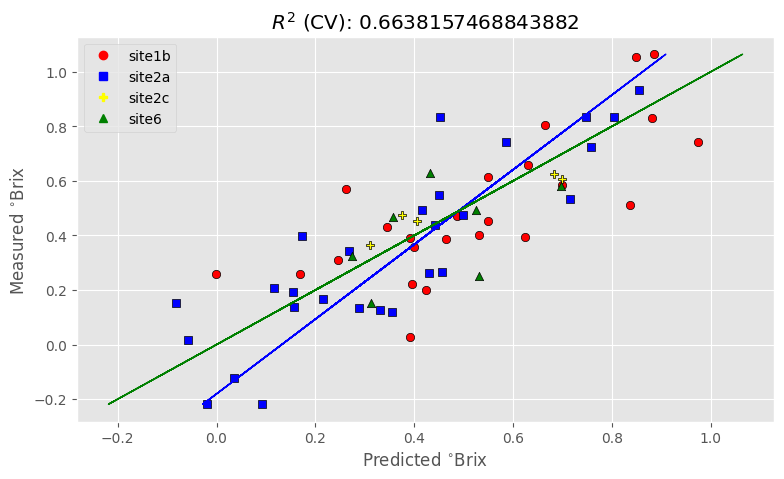

In [25]:
# opt_Xc_PN, ncomp_PN, wav_PN, sorted_ind_PN = pls_variable_selection(x_new_traits, log_y_weighted_pn, 50)
# file_name = 'F:/wenqu/result/pn.csv'
# simple_pls_cv(opt_Xc_PN, log_y_weighted_pn, ncomp_PN, labels_pc, file_name)

In [30]:
pls_pn = PLSRegression(n_components=37)
pls_pn.fit(x_new_traits, log_y_weighted_pn)

target_pn = pls_pn.coef_[:,0]
sorted_ind_pn = np.argsort(np.abs(target_pn))[::-1]
sorted_value_pn = target_pn[sorted_ind_pn]

print(x_new_traits.shape, sorted_ind_pn.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_pn = band_name[sorted_ind_pn][:84]
print(band_name_pn.shape, band_name_pn)

(65, 244) (244,)
(84,) ['b7_mean' 'b52_std' 'b120_std' 'b118_mean' 'b13_mean' 'b61_std' 'b59_std'
 'b109_std' 'b29_std' 'b103_std' 'b60_std' 'b37_std' 'b34_std' 'b101_std'
 'b15_std' 'b122_mean' 'b57_mean' 'b17_std' 'b6_std' 'b22_std' 'b114_std'
 'b56_std' 'b2_std' 'b7_std' 'b111_mean' 'b111_std' 'b113_mean' 'b15_mean'
 'b101_mean' 'b63_std' 'b41_std' 'b117_std' 'b26_std' 'b21_mean' 'b65_std'
 'b93_std' 'b58_std' 'b11_std' 'b56_mean' 'b28_std' 'b32_std' 'b9_std'
 'b5_std' 'b24_std' 'b99_std' 'b48_std' 'b13_std' 'b64_std' 'b9_mean'
 'b8_mean' 'b1_mean' 'b118_std' 'b83_std' 'b78_std' 'b50_std' 'b12_mean'
 'b16_std' 'b66_std' 'b8_std' 'b27_std' 'b104_mean' 'b53_std' 'b109_mean'
 'b18_std' 'b35_std' 'b16_mean' 'b3_mean' 'b31_std' 'b72_std' 'b82_std'
 'b95_std' 'b23_mean' 'b61_mean' 'b67_std' 'b108_std' 'b89_std' 'b110_std'
 'b117_mean' 'b59_mean' 'b116_std' 'b85_std' 'b66_mean' 'b102_std'
 'b107_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [31]:
sorted_value_pn[:84]

array([ 0.55272269,  0.54485681,  0.54452796, -0.52196087, -0.51887992,
       -0.51586363, -0.51022164,  0.48114734,  0.45738779, -0.41039713,
       -0.39645388,  0.38459999, -0.37472403,  0.36762751,  0.36236343,
       -0.36058355,  0.35823215, -0.350256  ,  0.34185063, -0.34123397,
       -0.32821095, -0.32565385, -0.32357929, -0.31873413, -0.31672803,
        0.3112561 ,  0.30872965, -0.30819937,  0.30752129,  0.30743116,
       -0.29994245, -0.29615527,  0.28975365,  0.2891974 ,  0.28737059,
        0.28696245,  0.28542525, -0.28180908,  0.27552681, -0.27546655,
       -0.26468825,  0.2627846 , -0.25708277,  0.25589598, -0.25533483,
        0.24978614,  0.24645007,  0.24578199, -0.24128786, -0.23684644,
       -0.23287229, -0.2281919 ,  0.22818734, -0.219602  ,  0.21737771,
       -0.21645567,  0.2142386 ,  0.21362155, -0.20993232,  0.20697094,
        0.20614031,  0.20236118,  0.19931766, -0.19771866, -0.19264582,
        0.19238957,  0.18600994, -0.18393208, -0.18363422, -0.18

# D15N


Optimised number of PLS components:  1
Wavelengths to be kept  50
Optimised MSEP  2.560337829059712

R2 calib: 0.067
R2 CV: -0.029
RMSE calib: 2.410
RMSE CV: 2.531
-0.8216553205003233 0.02780868206329642
0 site1b -0.05325272395113645 -2.674120998
1 site1b -0.5608178294921619 1.831297519
2 site1b -0.26351617818549167 2.088882277
3 site1b -0.29876292881933575 -1.259432228
4 site1b -0.21683181808315954 -1.321240785
5 site1b -1.6504551128138978 -1.05676545
6 site1b -1.2848394633148654 2.243227495
7 site1b 0.016703218830641964 -4.042904221
8 site1b -0.6640170424378263 -1.73009192
9 site1b -0.8223630794083265 -2.647368389
10 site1b -0.3101423773047105 1.36352194
11 site1b -1.042124187910833 -1.414529963
12 site1b -0.42451952430190354 -0.782025641
13 site1b -0.7482435433171805 -0.002255068
14 site1b -1.9719618087011974 -0.722110205
15 site1b -1.3596797197916013 0.847306639
16 site1b -2.278228473210741 -2.601431106
17 site1b -1.2325904455818337 -3.065337528
18 site1b -1.7960898475348581 0.007

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


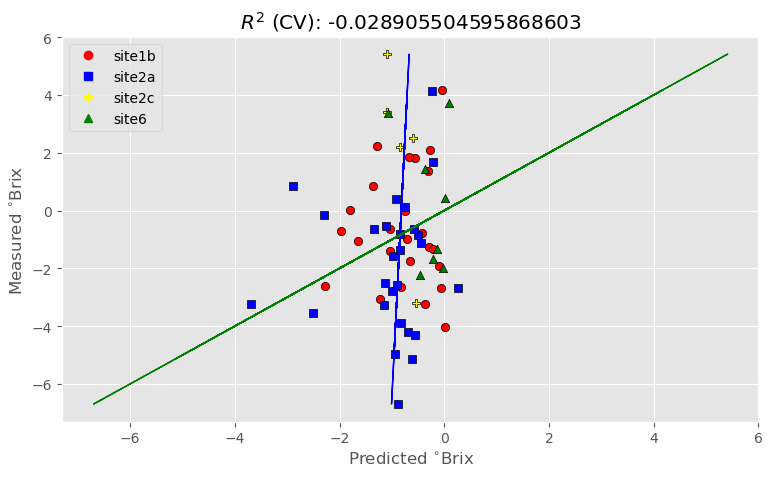

In [29]:
opt_Xc_D15N, ncomp_D15N, wav_D15N, sorted_ind_D15N = pls_variable_selection(x_new_traits, y_weighted_d15n, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\d15n.csv'
simple_pls_cv(opt_Xc_D15N, y_weighted_d15n, ncomp_D15N, labels_d15n, file_name)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


2% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  211
Optimised MSEP  4.337884595295797

R2 calib: 0.805
R2 CV: 0.306
MSE calib: 1.214
MSE CV: 4.322


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


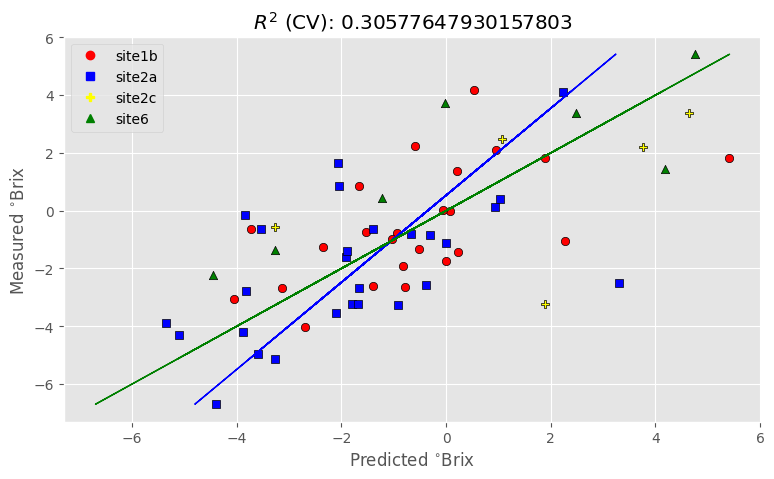

In [32]:
# opt_Xc_D15N, ncomp_D15N, wav_D15N, sorted_ind_D15N = pls_variable_selection(x_new_traits, y_weighted_d15n, 50)
# simple_pls_cv(opt_Xc_D15N, y_weighted_d15n, ncomp_D15N, labels_pc)

In [33]:
pls_D15N = PLSRegression(n_components=15)
pls_D15N.fit(x_new_traits, y_weighted_d15n)

target_D15N = pls_D15N.coef_[:,0]
sorted_ind_D15N = np.argsort(np.abs(target_D15N))[::-1]
sorted_value_D15N = target_D15N[sorted_ind_D15N]

print(x_new_traits.shape, sorted_ind_D15N.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_D15N = band_name[sorted_ind_D15N][:17]
print(band_name_D15N.shape, band_name_D15N)

(65, 244) (244,)
(17,) ['b118_std' 'b120_std' 'b108_mean' 'b113_std' 'b99_std' 'b9_std' 'b15_std'
 'b8_mean' 'b11_std' 'b101_std' 'b98_std' 'b109_std' 'b3_mean' 'b18_std'
 'b122_mean' 'b7_mean' 'b14_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## SLA trait model performance

In [ ]:
opt_Xc_sla, ncomp_sla, wav_sla, sorted_ind_sla = pls_variable_selection(x_sla, log_y_weighted_sla, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\without_std\sla.csv'
simple_pls_cv(opt_Xc_sla, y_weighted_sla, ncomp_sla, labels_sla, file_name)

In [22]:
# opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_sla, log_y_weighted_sla, 20)


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  202
Optimised MSEP  0.04229627536615127



C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [35]:
    # Calculate PLS with optimal components and export values
pls_sla = PLSRegression(n_components=15)
pls_sla.fit(x_sla, log_y_weighted_sla)

target = pls_sla.coef_[:,0]
sorted_ind_sla = np.argsort(np.abs(target))[::-1]
sorted_value = target[sorted_ind_sla]

print(x_sla.shape, sorted_ind_sla.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_sla = band_name[sorted_ind_sla][:42]
print(band_name_sla.shape, band_name_sla)

(63, 244) (244,)
(42,) ['b12_std' 'b107_std' 'b3_mean' 'b2_mean' 'b25_std' 'b103_std' 'b8_mean'
 'b8_std' 'b98_std' 'b7_std' 'b9_std' 'b116_std' 'b7_mean' 'b113_std'
 'b17_std' 'b59_std' 'b60_mean' 'b108_std' 'b52_std' 'b112_mean'
 'b121_mean' 'b16_std' 'b59_mean' 'b86_std' 'b97_std' 'b91_std' 'b119_std'
 'b48_std' 'b1_mean' 'b29_std' 'b5_std' 'b6_mean' 'b41_std' 'b117_mean'
 'b102_std' 'b14_std' 'b46_std' 'b13_std' 'b117_std' 'b90_mean' 'b96_std'
 'b18_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [36]:
sorted_value[:37]

array([-0.43441829, -0.39240569, -0.38522312,  0.37671377, -0.36683129,
       -0.36202362, -0.35725346, -0.34392944, -0.3264925 , -0.32592062,
        0.31701645,  0.30761535,  0.29245009,  0.28043509,  0.27255313,
       -0.25766164,  0.25359708,  0.24704501,  0.2466168 , -0.23303733,
       -0.22981616,  0.22639593,  0.22341652, -0.21638367,  0.21133117,
        0.20329602, -0.20258454,  0.19983927, -0.19916218,  0.18925685,
        0.1816399 ,  0.17864415, -0.1773872 ,  0.17662077, -0.17521421,
        0.17427863,  0.1701916 ])

R2 calib: 0.900
R2 CV: 0.468
RMSE calib: 8.799
RMSE CV: 20.340
[33.31312045] [0.65633637]
0 site2a [90.82464445] 103.2747295
1 site2a [101.13165439] 80.66983293
2 site2a [110.57636224] 102.8284309
3 site2a [83.80589003] 82.91700421
4 site2a [55.24663959] 30.65948379
5 site2a [73.92478294] 89.33730883
6 site2a [107.69757198] 97.78524765
7 site2a [86.19936615] 82.95197565
8 site2a [39.2750711] 40.13411702
9 site2a [90.05169207] 61.70927471
10 site2a [87.49594235] 106.8069372
11 site2a [67.10074472] 111.3697206
12 site2a [90.81499145] 67.02416794
13 site2a [68.06036053] 38.03518483
14 site2a [43.76769782] 49.08897627
15 site2a [86.98112915] 94.56050239
16 site2a [137.63766782] 97.95345642
17 site2a [31.07956473] 56.02569175
18 site2a [79.63987338] 86.59930961
19 site2a [98.00676857] 131.975223
20 site2a [112.17788977] 112.5509823
21 site2a [45.64638231] 83.23380828
22 site2a [82.83129548] 80.82213805
23 site2a [79.8300393] 69.86282383
24 site2a [118.81027863] 98.0068749
25 site1b [121.011

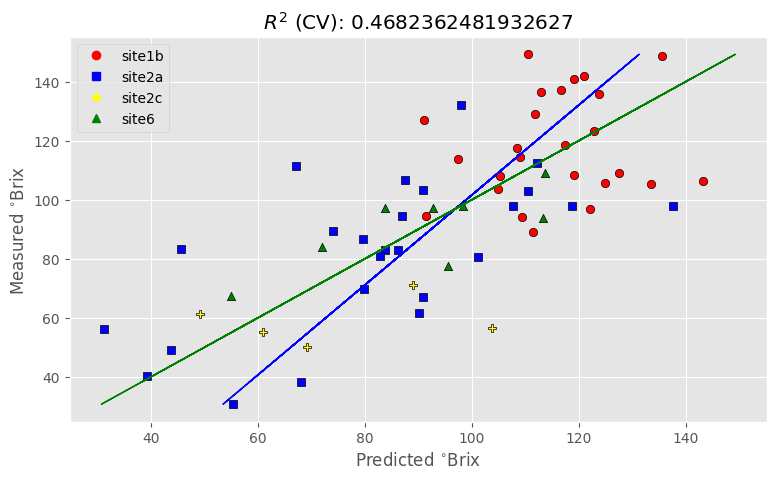

In [26]:
file_name = 'F:/wenqu/result/sla.csv'
simple_pls_cv(opt_Xc, y_weighted_sla, ncomp, labels_sla,file_name)

# LA trait model performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  19
Wavelengths to be discarded  216
Optimised MSEP  0.25118937049737045

R2 calib: 0.942
R2 CV: 0.800
RMSE calib: 0.280
RMSE CV: 0.519
[0.20146711] [0.9095718]
0 site2a [1.28002294] 2.03933806110202
1 site2a [0.49298462] 0.6395845072894734
2 site2a [1.22150664] 0.5745683736115578
3 site2a [0.98519381] 0.34365992178293403
4 site2a [1.10081839] 1.0043016091968684
5 site2a [3.26693958] 3.3856366879307305
6 site2a [1.37062221] 1.4142337297280947
7 site2a [1.18653634] 1.523410666446841
8 site2a [1.11405224] 1.3283067266597688
9 site2a [0.83511819] 0.5730959494921153
10 site2a [1.94340388] 1.6203124030507472
11 site2a [1.48105323] 0.8304286552040054
12 site2a [1.37375493] 0.8854470368753472
13 site2a [1.02541944] 0.9573733110632762
14 site2a [0.1008357] 0.8908330540059648
15 site2a [0.90362159] 0.8911149257045661
16 site2a [0.14790939] 0.7441858972203359
17 site2a [1.92067543] 1.3263563525774782
18 site2a [-0.09497298] 0.6257108477521713
19

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


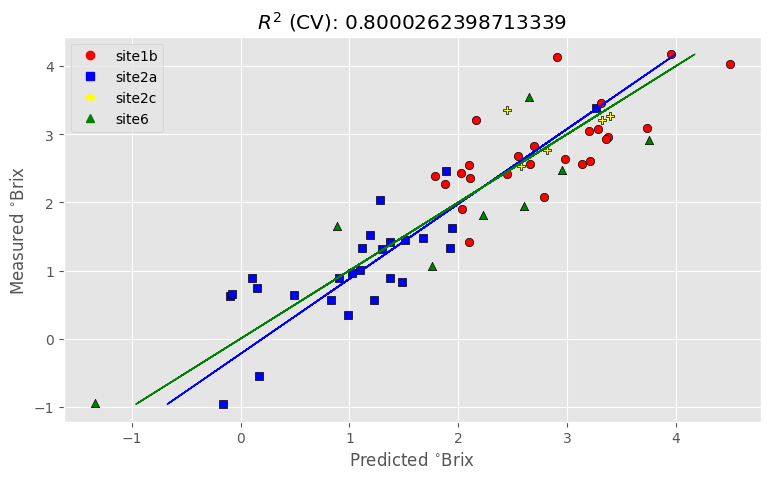

In [27]:
opt_Xc_la, ncomp_la, wav_la, sorted_ind_la = pls_variable_selection(x_la, log_y_weighted_la, 20)
file_name = 'F:/wenqu/result/la.csv'
simple_pls_cv(opt_Xc_la, log_y_weighted_la, ncomp_la, labels_la,file_name)

In [39]:
pls_la = PLSRegression(n_components=19)
pls_la.fit(x_la, log_y_weighted_la)

target_la = pls_la.coef_[:,0]
sorted_ind_la = np.argsort(np.abs(target_la))[::-1]
sorted_value_la = target_la[sorted_ind_la]

print(x_la.shape, sorted_ind_la.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_la = band_name[sorted_ind_la][:28]
print(band_name_la.shape, band_name_la)

(64, 244) (244,)
(28,) ['b120_std' 'b4_mean' 'b12_std' 'b103_std' 'b7_std' 'b8_std' 'b107_std'
 'b108_mean' 'b122_std' 'b10_std' 'b5_mean' 'b2_mean' 'b52_std'
 'b110_mean' 'b1_mean' 'b15_mean' 'b11_std' 'b56_std' 'b65_std' 'b105_std'
 'b116_std' 'b32_std' 'b108_std' 'b6_std' 'b24_std' 'b64_std' 'b75_mean'
 'b42_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [40]:
sorted_value_la[:28]

array([ 1.5185541 ,  1.31489055,  1.20525765, -1.19013593, -1.1524492 ,
       -1.09263922,  1.06409971,  1.06288379, -1.03047211,  1.00743494,
        0.97274802, -0.92978124,  0.92053764, -0.84902447, -0.83916159,
       -0.83282995, -0.81182278, -0.79145067,  0.77426903, -0.76944473,
       -0.75237812, -0.71333558,  0.70569779,  0.66277997,  0.65061342,
        0.64109899, -0.62028272, -0.61463346])

## LDMC trait performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  19
Wavelengths to be discarded  186
Optimised MSEP  0.06728643202469226

R2 calib: 0.975
R2 CV: 0.586
RMSE calib: 0.067
RMSE CV: 0.274
[-0.09845477] [0.8085888]
0 site2a [-0.31952969] -0.8400546733818541
1 site2a [-0.67505719] -0.6281332243345488
2 site2a [-0.22865851] -0.27934189264188575
3 site2a [-0.43528024] -0.6983870185650685
4 site2a [-0.25668957] -0.5343744161848074
5 site2a [-0.2988553] -0.21647660611469058
6 site2a [-0.1128192] -0.2167898252991496
7 site2a [-1.0382816] -0.36857314188241097
8 site2a [-0.31131278] -0.6942240461716448
9 site2a [-0.42164095] -0.6078965450996374
10 site2a [0.10599422] 0.3935791322690429
11 site2a [0.1720445] 0.32185538909601774
12 site2a [-0.40894714] 0.06038465890999225
13 site2a [-0.11440115] -0.5834753932040008
14 site2a [-1.21052866] -0.8380249381313605
15 site2a [0.18983035] 0.10578779196230385
16 site2a [-0.48570688] -0.639776384474245
17 site2a [-0.55268807] -0.812539884036738
18 site2a [-

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


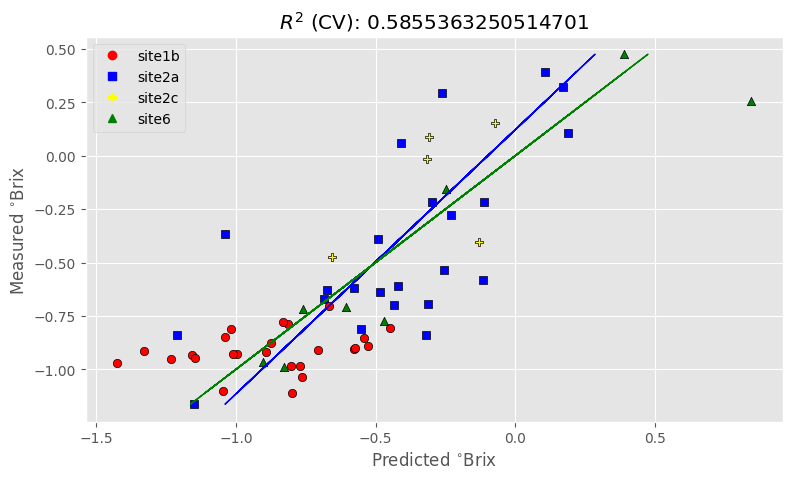

In [28]:
opt_Xc_ldmc, ncomp_ldmc, wav_ldmc, sorted_ind_ldmc = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 20)
file_name = 'F:/wenqu/result/ldmc.csv'
simple_pls_cv(opt_Xc_ldmc, log_y_weighted_LDMC, ncomp_ldmc, labels_ldmc,file_name)

In [42]:
pls_ldm = PLSRegression(n_components=19)
pls_ldm.fit(x_ldmc, log_y_weighted_LDMC)

target_ldmc = pls_ldm.coef_[:,0]
sorted_ind_ldmc = np.argsort(np.abs(target_ldmc))[::-1]
sorted_value_ldmc = target_ldmc[sorted_ind_ldmc]

print(x_ldmc.shape, sorted_value_ldmc.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_ldmc = band_name[sorted_ind_ldmc][:58]
print(band_name_ldmc.shape, band_name_ldmc)

(61, 244) (244,)
(58,) ['b12_std' 'b107_std' 'b114_std' 'b122_mean' 'b104_std' 'b118_std'
 'b29_std' 'b103_std' 'b7_mean' 'b49_std' 'b100_std' 'b22_std' 'b19_mean'
 'b4_mean' 'b106_std' 'b117_std' 'b10_mean' 'b11_std' 'b118_mean'
 'b33_std' 'b111_mean' 'b2_std' 'b3_mean' 'b113_std' 'b25_std' 'b41_std'
 'b6_std' 'b16_std' 'b51_std' 'b16_mean' 'b10_std' 'b23_std' 'b21_mean'
 'b104_mean' 'b8_mean' 'b114_mean' 'b17_mean' 'b112_std' 'b107_mean'
 'b112_mean' 'b113_mean' 'b108_std' 'b50_std' 'b62_std' 'b59_mean'
 'b26_std' 'b42_std' 'b37_std' 'b59_std' 'b83_std' 'b86_std' 'b121_mean'
 'b1_std' 'b24_std' 'b91_std' 'b5_std' 'b13_mean' 'b45_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [44]:
sorted_value_ldmc[:58]

array([ 0.87283161,  0.69586035, -0.66216271,  0.53449396,  0.52959853,
       -0.51677891, -0.51652949,  0.49197749, -0.47320977, -0.45132279,
        0.43157955, -0.4299128 ,  0.42356136, -0.41807745, -0.41080967,
       -0.40569663, -0.39670665, -0.3766288 ,  0.37580329,  0.36225404,
       -0.36005039,  0.34960647,  0.34876766, -0.33919639,  0.33252942,
        0.32446598,  0.31578737,  0.30682573,  0.29809496, -0.29412146,
       -0.29301816, -0.29029987,  0.28407104, -0.28067554,  0.2805083 ,
        0.27004133,  0.26827698,  0.26773506, -0.26088023,  0.25704999,
       -0.254121  ,  0.24826321,  0.24789986, -0.24468324, -0.24161315,
        0.24145099, -0.23940519, -0.23181667,  0.22976915, -0.22756014,
        0.22554545,  0.22318177, -0.22065604, -0.21060886, -0.20830108,
       -0.20511101, -0.20482014,  0.20317165])

In [7]:
def optimise_pls_cv(X, y, n_comp, vol_mois, n_2a, n_1b, n_2c, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    print(y_c.shape, type(y_c), y_c[0:27, ])   
    
#     break
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    
    


 
    # Fit a line to the CV vs response

    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
       
        ax.scatter(y_c[0:n_2a, ], y[0:n_2a, ], c=vol_mois[0:n_2a, ],  cmap='Spectral', marker= '*',edgecolors='k')
        ax.scatter(y_c[n_2a:n_1b, ], y[n_2a:n_1b, ], c=vol_mois[n_2a:n_1b, ],  cmap='Spectral', marker= 'v',edgecolors='k')
        ax.scatter(y_c[n_1b:n_2c, ], y[n_1b:n_2c, ], c=vol_mois[n_1b:n_2c, ],  cmap='Spectral', marker= '.',edgecolors='k')
#         plt.colorbar()
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

100% completed
Suggested number of components:  4



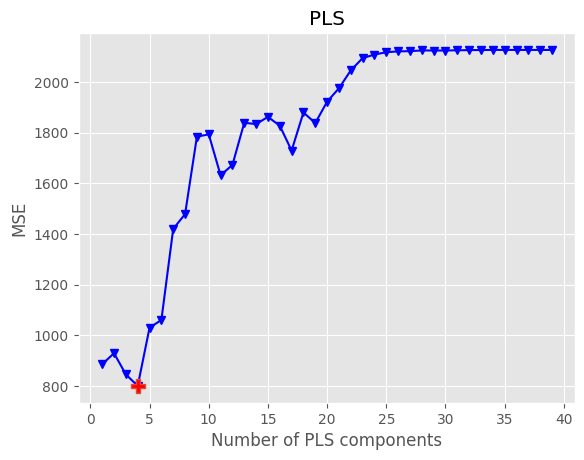

(56, 1) <class 'numpy.ndarray'> [[100.14522519]
 [ 83.44556852]
 [ 82.30072386]
 [ 95.7502133 ]
 [ 89.91668521]
 [ 72.95647577]
 [ 65.81979966]
 [ 90.05550588]
 [ 98.59752861]
 [ 71.97082453]
 [ 74.59151939]
 [110.04590405]
 [ 73.38565248]
 [ 75.989292  ]
 [ 60.00641012]
 [ 79.88287051]
 [ 83.07218245]
 [104.34650163]
 [ 49.56486446]
 [ 88.14917957]
 [ 89.66255983]
 [ 98.01474101]
 [ 77.54400701]
 [ 78.8488547 ]
 [ 82.89128284]
 [ 93.60250684]
 [ 95.85132464]]
97.52951800160714 30.65948379 156.4331066 (56,)
98.14194881957064 54.58155491004162 136.91026429099426 (56,)
0.4022353399517946 0.0021184653748089676
R2 calib: 0.392
R2 CV: 0.122
MSE calib: 554.097
MSE CV: 800.217


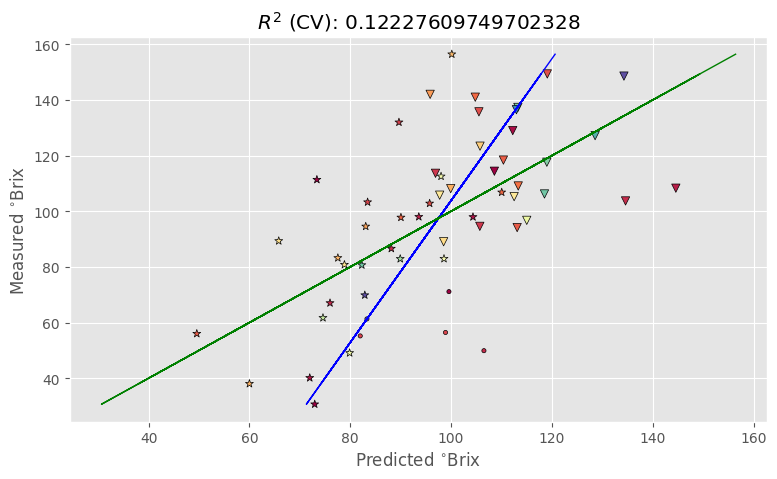

In [8]:
optimise_pls_cv(x_sla,y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



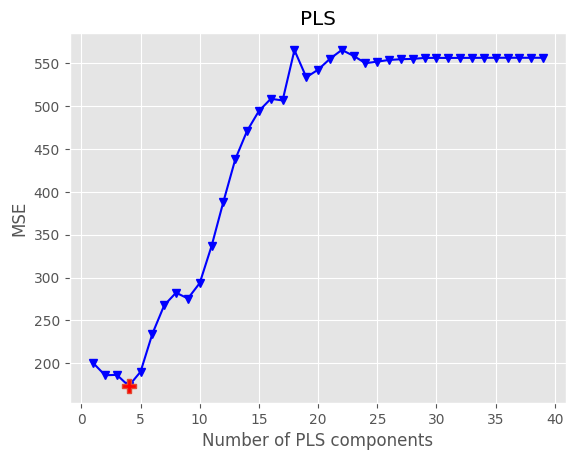

(57, 1) <class 'numpy.ndarray'> [[16.12334583]
 [ 8.64010269]
 [ 0.32257711]
 [13.63182918]
 [ 9.8043189 ]
 [ 1.85828811]
 [ 5.80304817]
 [12.13157419]
 [14.31505597]
 [ 2.1227174 ]
 [ 5.03779966]
 [21.28610393]
 [13.38236389]
 [-3.7934635 ]
 [ 2.25644219]
 [ 1.01631938]
 [16.10958415]
 [ 4.83543848]
 [ 3.06297141]
 [-8.76390189]
 [12.99444201]
 [ 7.59972832]
 [ 8.57117804]
 [ 1.17405755]
 [ 4.38521038]
 [ 7.43526545]
 [10.40477663]]
13.105196248473685 0.382217195 64.9665 (57,)
12.891763435905611 -12.031634986458883 36.17553260363307 (57,)
0.41715084266962005 0.001245778628025292
R2 calib: 0.351
R2 CV: 0.125
MSE calib: 128.861
MSE CV: 173.613


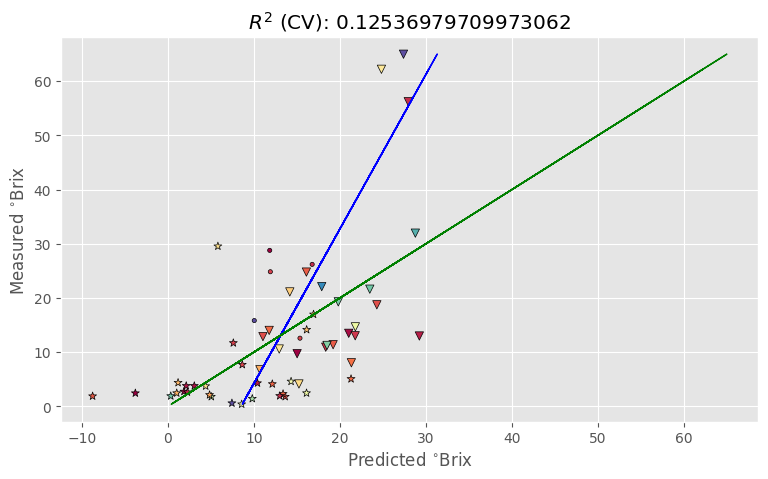

In [11]:
# optimise_pls_cv(x_la,y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



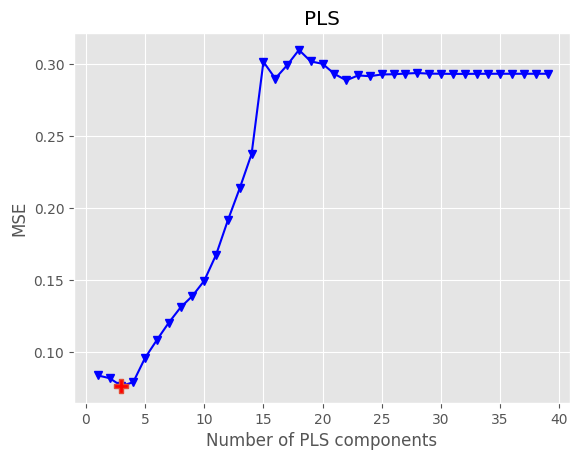

(54, 1) <class 'numpy.ndarray'> [[0.66369326]
 [0.72234145]
 [0.68084528]
 [0.5697319 ]
 [0.61483661]
 [0.92471408]
 [0.66130245]
 [0.55671712]
 [0.6689897 ]
 [0.42838539]
 [0.80581823]
 [0.92088838]
 [1.04383866]
 [0.7519472 ]
 [0.82773806]
 [0.41117845]
 [0.97116268]
 [0.50562356]
 [0.67900353]
 [0.5712629 ]
 [0.76418366]
 [0.7753452 ]
 [0.70404096]
 [0.76575143]
 [0.46294421]
 [0.5229809 ]
 [0.40755549]]
0.5839847452407407 0.312566614 1.482276575 (54,)
0.592443735679536 0.2076726163324087 1.0597301027323587 (54,)
0.362831524622251 0.007008695450962661
R2 calib: 0.373
R2 CV: 0.077
MSE calib: 0.052
MSE CV: 0.077


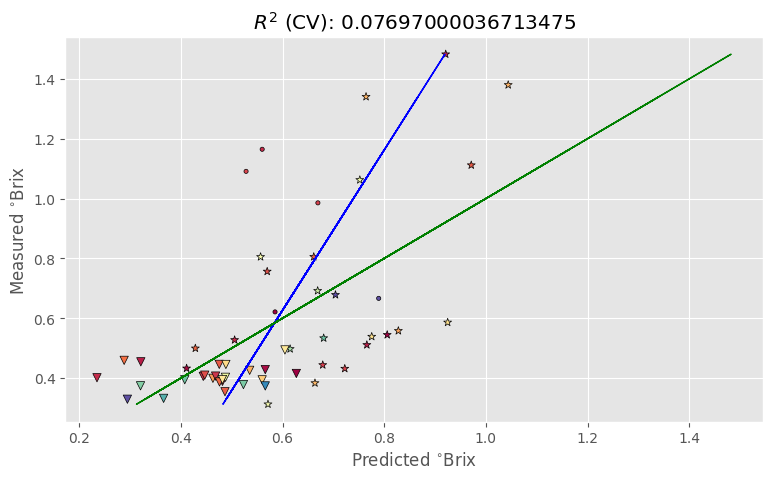

In [12]:
# optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

In [13]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

100% completed
Suggested number of components:  3



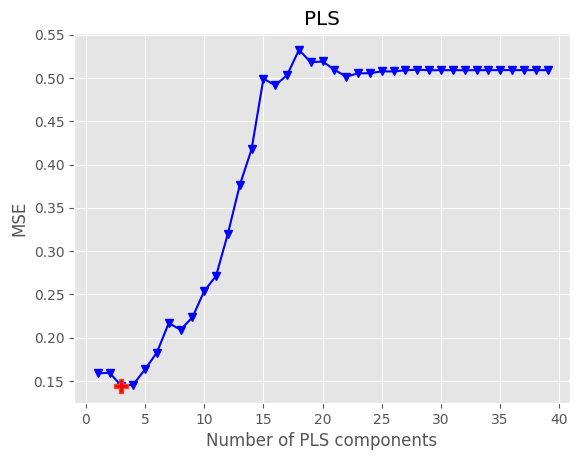

(54, 1) <class 'numpy.ndarray'> [[-0.49479888]
 [-0.4198425 ]
 [-0.47992183]
 [-0.66265903]
 [-0.56789601]
 [-0.12837464]
 [-0.50432847]
 [-0.65811124]
 [-0.48280179]
 [-0.81015351]
 [-0.2958642 ]
 [-0.16154929]
 [ 0.01154481]
 [-0.380775  ]
 [-0.27352672]
 [-0.84344335]
 [-0.06685312]
 [-0.72688334]
 [-0.48299009]
 [-0.64052947]
 [-0.38027062]
 [-0.33993316]
 [-0.43709744]
 [-0.35458853]
 [-0.79700254]
 [-0.7516939 ]
 [-0.89185226]]
-0.6300255935830665 -1.1629376677220686 0.3935791322690429 (54,)
-0.6141439262076958 -1.158650192231192 0.058043104042614035 (54,)
0.4016076053488608 0.002612644321756458
R2 calib: 0.407
R2 CV: 0.108
MSE calib: 0.096
MSE CV: 0.144


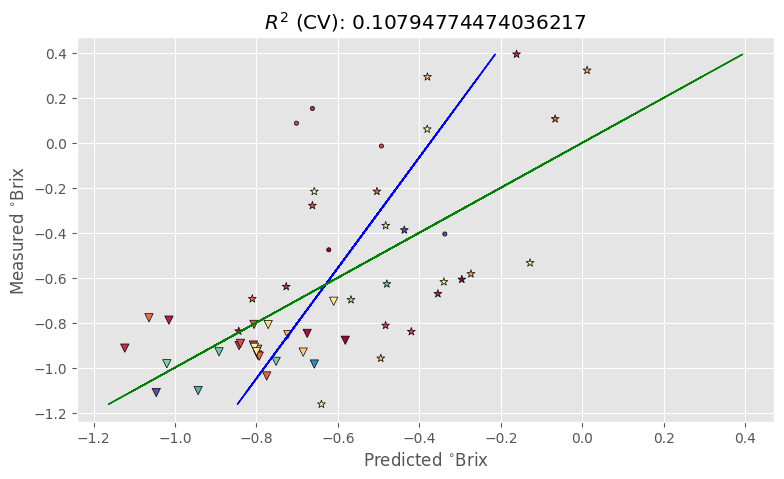

In [14]:
# optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



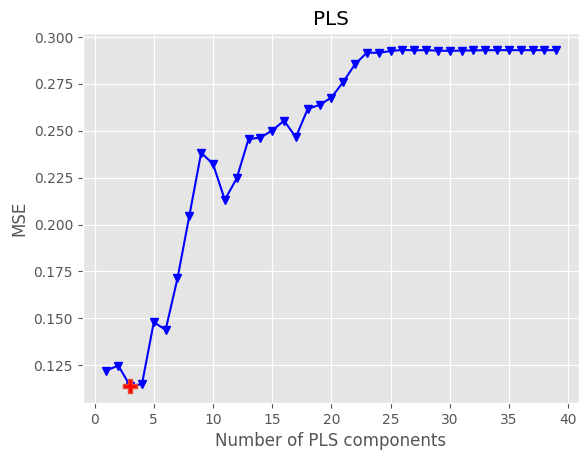

(56, 1) <class 'numpy.ndarray'> [[4.45185281]
 [4.33379357]
 [4.38932534]
 [4.57269872]
 [4.46696097]
 [4.18149313]
 [4.14198082]
 [4.39992236]
 [4.56702273]
 [4.26346354]
 [4.38984078]
 [4.71870934]
 [4.22983289]
 [4.15020909]
 [4.01221974]
 [4.34400018]
 [4.25955715]
 [4.68929539]
 [4.07369156]
 [4.64672207]
 [4.40052694]
 [4.49338197]
 [4.37332484]
 [4.27044994]
 [4.33027231]
 [4.3111235 ]
 [4.65197074]]
4.521913490728343 3.422942036707019 5.0526284847384995 (56,)
4.5184234230319555 4.050354849026919 5.015641281635213 (56,)
0.40833278389209293 0.0017830679096209163
R2 calib: 0.359
R2 CV: 0.132
MSE calib: 0.084
MSE CV: 0.114


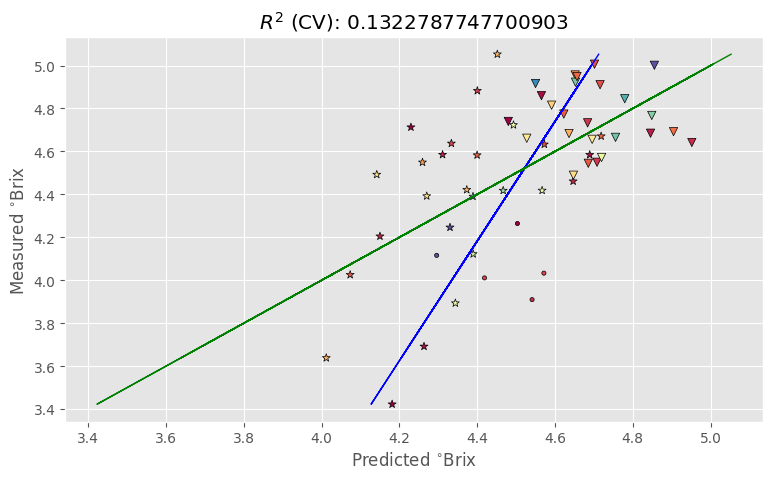

In [15]:
# optimise_pls_cv(x_sla,log_y_weighted_sla, 40, plot_components=True)
optimise_pls_cv(x_sla,log_y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



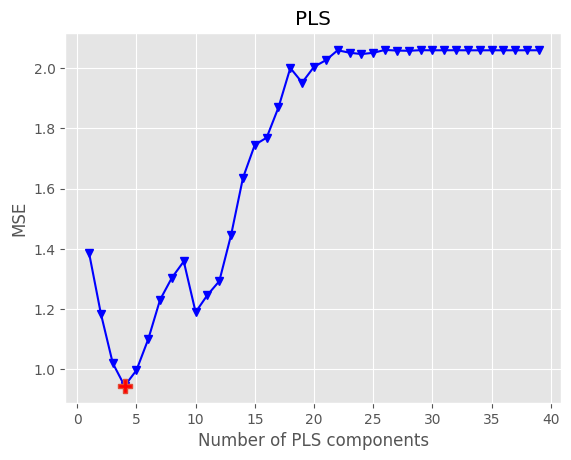

(57, 1) <class 'numpy.ndarray'> [[2.06926206]
 [1.45688824]
 [0.58727726]
 [2.18994256]
 [1.69089744]
 [0.95800027]
 [1.53072841]
 [1.74067221]
 [2.00450621]
 [1.04374863]
 [1.29825609]
 [2.56905049]
 [1.82442281]
 [0.25358621]
 [1.21608696]
 [1.24225437]
 [2.21085015]
 [1.38076871]
 [1.36632003]
 [0.12439473]
 [2.08550819]
 [1.32399447]
 [1.22530281]
 [1.19951706]
 [1.16984556]
 [1.1556189 ]
 [1.54193933]]
2.018387095391922 -0.9617662586536878 4.173871752423952 (57,)
2.0182860733117436 0.02402726998273108 3.4059306453879197 (57,)
0.5341931038481157 1.870943373571431e-05
R2 calib: 0.446
R2 CV: 0.267
MSE calib: 0.715
MSE CV: 0.945


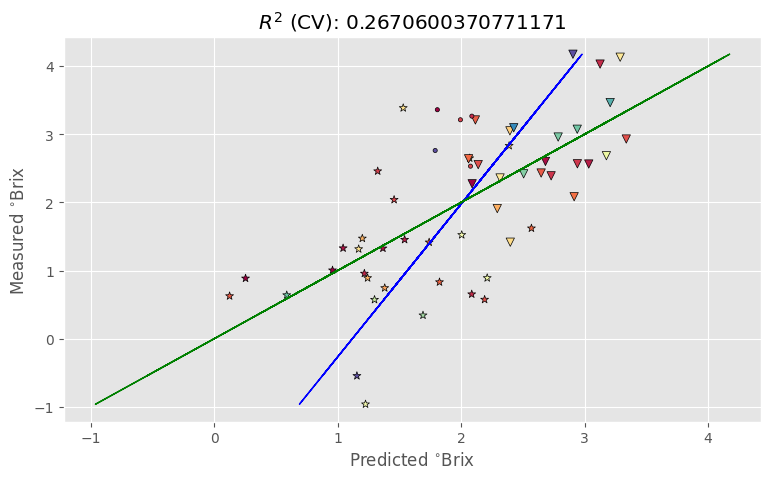

In [16]:
# optimise_pls_cv(x_la,log_y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,log_y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)